# Pyplot指南

1. 简介
2. 使用关键字字符串制图
3. 使用类别变量制图
4. 控制线段参数
5. 使用多个图形和坐标轴
6. Working with text
7. Logarithmic and other nonlinear axes

## 简介

> matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

matplotlib.pyplot是一组命令风格的函数集合，使得matplotlib用起来像MATLAB. 每一个函数都会对图做一些修改：例如，新建一个图，新建一个绘制区，在绘制区画几条线，以及设置标签等。

> In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

在matplotlib.pyplot中，函数调用之间会保留各种状态，以便跟踪当前图形和绘图区域之类的东西，并将绘图函数定向到当前轴。

请注意，"axes"在此处以及文档中的大部分地方指的是图形figure的子图坐标轴axes部分，而不是多于一个坐标轴的严格数学术语。

> Note
>
> pyplot API通常不如面向对象的API灵活。其大部分函数调用也可以通过Axes对象中的方法调用。建议浏览教程和示例以了解其工作原理。

使用pyplot生成可视化效果是非常快速的：

Text(0, 0.5, 'some numbers')

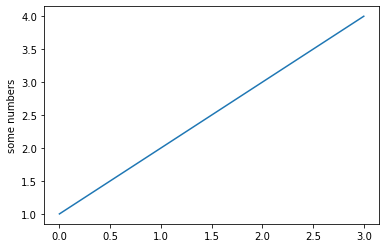

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')

> You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].

也许有人很好奇，为什么图中的x轴区间是0-3而y轴区间是1-4. 如果在plot()命令中只提供了一个list或array，matplotlib假设其为y值序列，并自动生成x值。但是python的range是从0开始的，而缺省的x向量与y等长，所有x的数值为[0, 1, 2, 3].

> plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

plot()是一个具有多种功能的命令，接受任意数量的参数。例如，绘制一组x与y，命令如下：

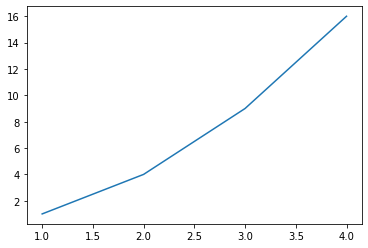

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot  格式化制图样式

> For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

对于任意的一对x, y参数，都有可选的第三个参数，形式字符串，用于指示绘制的颜色与线型。形式字符串的字符与符号来自MATLAB，我们将其颜色字符串与线型字符串连在一起。形式字符串的缺省值是'b-'，蓝色实线。

现在，我们将上图重新用红色圆圈绘制，命令如下：

[0, 6, 0, 20]

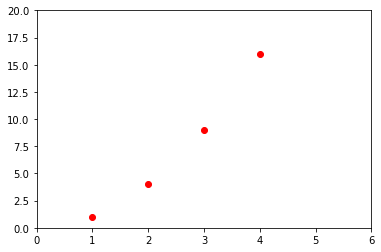

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])

> See the plot() documentation for a complete list of line styles and format strings. The axis() command in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

形式字符串的完整列表在plot()文档。上例中的axis()命令接收形如[xmin, xmax, ymin, ymax]的列表，指定axes的视口。

> If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one command using arrays.

若matplotlib仅限于处理列表数据，那对于数值处理来说就是个废物。通常，我们使用numpy数组。实际上，在内部所有的序列都被转换成numpy数组。下面，我们使用数组在一个命令中绘制几条不同样式风格的线。

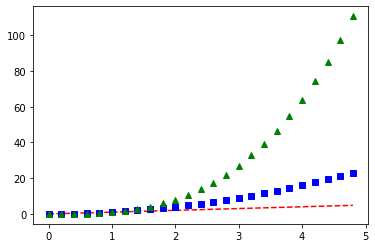

In [4]:
import numpy as np

t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

## Plotting with keyword strings 使用关键字字符串制图

> There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

在某些情况下，我们具有某种格式的数据，该格式允许使用字符串访问特定变量。例如，使用numpy.recarray或pandas.DataFrame。

> Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

Matplotlib允许您为此类对象提供data关键字参数。 如果提供的话，您可以使用与这些变量相对应的字符串生成图。

Text(0, 0.5, 'entry b')

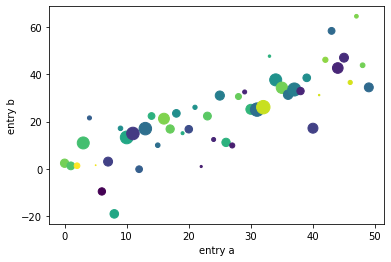

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

## 使用类别变量制图

> It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

也可以使用类别变量创建图。Matplotlib允许直接将类别变量传递给大部分制图函数。例如：

Text(0.5, 0.98, 'Categorical Plotting')

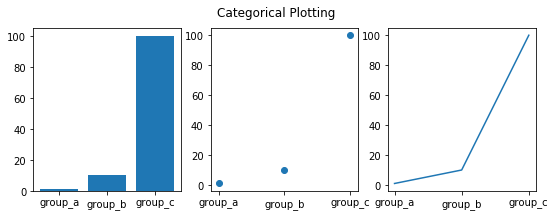

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

## 控制线段参数

> Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties

线段有许多可以设置的属性：线段宽度，虚线风格，抗锯齿等；具体查阅 matplotlib.lines.Line2D. 以下是设置线段属性的几种方法：

- 使用字参数

In [ ]:
plt.plot(x, y, linewidth=2.0)

> Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

- 使用Line2D实例的setter方法。plot返回Line2D对象列表；如：line1, line2 = plot(x1, y1, x2, y2). 

In [ ]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

> Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

- 使用setp()命令。下例使用一个MATLAB风格的命令设置多个属性于线段列表。setp工作于一个对象列表或单个对象。即可使用python关键字参数也可食用MATLAB风格的串/值对。

In [ ]:
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

> To get a list of settable line properties, call the setp() function with a line or lines as argument

要获取可设置的线属性的列表，请使用一个或多个line作为参数调用setp（）函数

In [ ]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

## 使用多个图形和坐标轴

> MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

MATLAB和pyplot都有当前图像与当前坐标轴的概念。所有的制图命令都应用于当前坐标轴。函数gca()返回当前坐标轴（matplotlib.axes.Axes实例)，gcf()返回当前图形（matplotlib.figure.Figure实例）。通常，不需要操这些心，因为它们都被幕后照顾的很好。下面的脚本将创建两个子图。

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

> The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don't manually specify any axes. The subplot() command specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows*numcols. The commas in the subplot command are optional if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1).

figure()命令在这里是可选的，因为figure(1)默认被创建，就如未手动指定任何坐标轴时subplot(111)默认被创建。subplot命令指定行数numrows,列数numcols，子图数量plot_number这里plot_number的取值范围从1至numrows\*numcols. 如果numrows\*numcols<10 subplot命令中的逗号是可选项。所以subplot(211)等同于subplot(2, 1, 1).

> You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates. See Axes Demo for an example of placing axes manually and Basic Subplot Demo for an example with lots of subplots.

我们可以创建任意数量的子图与坐标轴。如果想要手动放置一个坐标轴，比如，不想将坐标轴放置在矩形网格上，使用axes()命令，该命令可将位置指定为axes([left，bottom，width，height])，这里所有的值以小数（0到1）坐标表示。

> You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

我们可以多次调用带有递增图形编号的figure()以创建多个图形。当然，每个图形可以包含多个坐标轴和子图。

d:\apps\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Easy as 1, 2, 3')

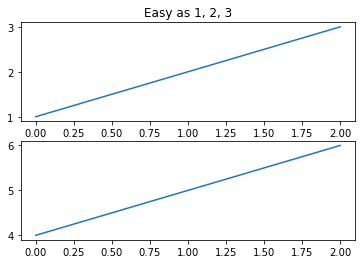

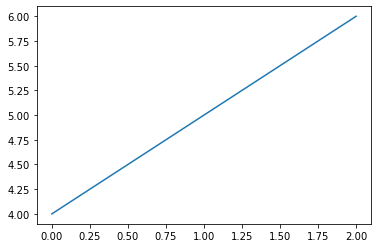

In [7]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

> You can clear the current figure with clf() and the current axes with cla(). If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object oriented API, which you can use instead (see Artist tutorial)

我们可以使用clf()清除当前图形，cla()清除当前坐标轴。如果您发现在后台为您维护状态（特别是当前图像，图形和坐标轴）很烦人，请不要绝望：这只是面向对象API的薄状态包装，可以使用（参见艺术家教程）代替。

> If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

如果要制作大量图形，则还需要注意一件事：在使用close()显式关闭图形之前，图形所需的内存不会完全释放。 删除对图形的所有引用，和/或使用窗口管理器杀死图形在屏幕上出现的窗口是不够的，因为pyplot会保留内部引用，直到调用close()为止。